# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104a7d1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b4948d0>]], dtype=object)

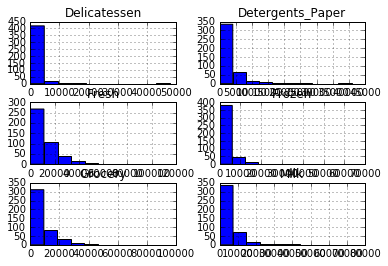

In [3]:
data.hist()

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
>- PCA could reveal a large variance in spending amounts on prepared foods (Delicatessen category) and on unprepared foods (Fresh, Milk, Frozen).
- PCA might also show variance in the data of spending amounts on perishable goods (Fresh, Milk, Grocery) and on non-perishables (Frozen, Detergents_Paper).

> - ICA dimensions might reveal hidden sources of the data, perhaps in the form of specific business types. For example, a dimension might show a pattern in how restaurant customers spend across the categories.

### PCA

In [6]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=len(data.columns), copy=True, whiten=False)

# fit the data
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
> Variance drops by a small amount from the first to second dimension (.459 to .405), but then drops off dramatically to much lower variances (.044, .015, .006).

> I would use 2 dimensions as they appear to capture a much more significant portion of the data than the remaining 4 dimensions. Using 2 dimensions will also allow for plotting of the data, which may give further insight into how to create useful customer segments.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
> The dimensions seem to represent correlations of spending amounts on each category, and (in order) how well they explain the variance in the data. The first dimension shows that spending on 'Fresh' is unrelated to the other categories, and the second dimension shows that spending on 'Milk', 'Grocery', and 'Detergents_Paper' are correlated.
     
> This information can be used to transform the dataset into fewer dimensions before applying a learner to create customer segments.

### ICA

In [7]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=None, algorithm='parallel', whiten=True, fun='logcosh', \
              fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)

# fit the data
ica.fit(data)

# Print the independent components
print ica.components_

[[ -1.53176824e-07  -9.84762157e-06   5.80320012e-06   3.65067309e-07
   -3.29533682e-06   6.06076901e-06]
 [  3.86326103e-07   2.19510176e-07   6.02222419e-07   5.22092677e-07
   -5.11433692e-07  -1.80930889e-05]
 [  3.02056799e-07  -2.28632227e-06  -1.21133567e-05   1.45961796e-06
    2.82162343e-05   5.73586122e-06]
 [  8.65325956e-07   1.40047969e-07  -7.74553859e-07  -1.11460262e-05
    5.57327810e-07   5.95263537e-06]
 [ -2.11900289e-07   1.90028280e-06  -6.33126651e-06  -4.23359229e-07
    5.88541178e-07   1.40889141e-06]
 [ -3.97567062e-06   8.56872307e-07   6.12174756e-07   6.78475137e-07
   -2.03510564e-06   1.04994920e-06]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
> Each vector transforms the features into a space where the new features provide no information about each other yet still retain mutual information with the original features. Each vector shows how to project the original data into the new space:
1. Put more weight on 'Fresh', 'Detergents_Paper'.
2. Put less weight on 'Delicatessen' -- this could be a customer segment based on a single category.
3. Put more weight on 'Milk', 'Detergents_Paper', 'Delicatessen'.
4. Put less weight on 'Grocery', somewhat less on 'Milk'.
5. Put more weight on 'Fresh', 'Milk', 'Detergents_Paper'.
6. Put less weight on 'Frozen', somewhat less on 'Grocery'.

> The components can be used to transform the data to recover the acutal source(s) of variation in category spending amounts, which could be associated with specific business types (or, customer segments) of the customers.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
> **K Means**: Simple, fast, and effective method to partition data points into groups (clusters). Use of hard assignment can lead to questionable border/edge cases to be mis-grouped.

> **Gaussian Mixture Models**: Uses probability to determine the likelihood of an example belonging to a cluster. Soft assignment can express uncertainty in cluster assignment (unlike K Means). 

> K Means will be used because of its simplicity and its relatively easier-to-explain methodology, which would make explanation of the data visualization easier to a non-technical audience (especially in comparison to explaining that GMM utilizes a mixture of Gaussian distributions with unknown parameters to cluster the data).

> Although K Means produces a "hard assignment" of data points to a cluster that could produce clusters with mis-grouped data, the clusters themselves are not the ultimate objective. The clusters will be used to segment customers into groups that can be analyzed further with new experiments. This may either validate the segments that are created, or show that new segmentation methods should be explored.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [8]:
# Import clustering modules
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GMM

In [9]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2, copy=True, whiten=False)
pca.fit(data)

reduced_data = pca.transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


#### How to choose number of clusters?
We can use [silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py) to study the separation distance between potential clusters and choose an optimal value for `n_clusters`. 

From the scikit-learn documentation:
> The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

> Silhoette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters.

After examining the creation of 2 to 12 clusters, it appears that choosing 5 or fewer clusters will be most useful in producing meaningful cluster boundaries.

In [10]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,12):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_data)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into cluster density and separation
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.54260629285749551)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.52291208240435094)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.46235710278169811)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.45182620708674198)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.43156890538615494)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.43356714476822628)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.41082645832635967)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.41156267643056577)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.38511328163771913)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.39964497955065109)


### K Means

In [59]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
est = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, \
             precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)

clusters = est.fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


### DBSCAN - Density-Based Spatial Clustering of Applications with Noise
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

In [ ]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
est = DBSCAN(eps=0.3, min_samples=10, metric='euclidean', algorithm='auto', leaf_size=30, \
             p=None, random_state=None)

clusters = est.fit(reduced_data)
print clusters
clusters.labels_

### Plot the data, clusters

In [60]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [61]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[ -9052.39957144  -4808.55909102]
 [  5607.91709853  14199.18040025]
 [-14537.71774395  61715.67085248]
 [  6399.7117556   -4169.29690862]
 [-37704.64157991  -5488.35405895]]


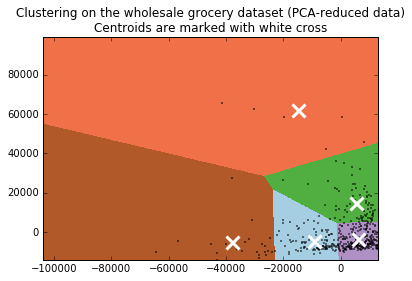

In [62]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()
plt.show()

#### Data looks like log transformation would be useful
https://en.wikipedia.org/wiki/Data_transformation_(statistics)

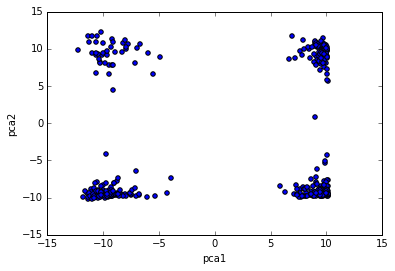

In [15]:
test_data = pd.DataFrame(reduced_data, columns = ['a', 'b'])
test_data.loc[:, 'pca1'] = np.arcsinh(test_data.a)
test_data.loc[:, 'pca2'] = np.arcsinh(test_data.b)
test_data.plot(kind='scatter', x='pca1', y='pca2')

#### Show clustering with transformed data, k=4

In [66]:
## new data to cluster and plot
trans_data = test_data.values[:,2:]
print type(trans_data)
print trans_data[:3]

<type 'numpy.ndarray'>
[[-7.17015417  8.06181441]
 [ 9.08858057  8.99775379]
 [ 9.17823006  8.548212  ]]


[[-9.44876133 -9.34172402]
 [ 9.29074185 -9.15696672]
 [ 9.46665464  9.38802736]
 [-9.27821441  9.45163712]]


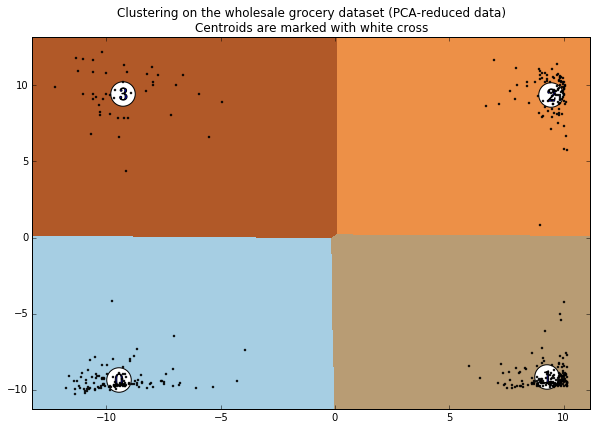

In [67]:
# fit data with different number of clusters
k_clusters = 4
est = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, \
             precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)

clusters = est.fit(trans_data)

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = trans_data[:, 0].min() - 1, trans_data[:, 0].max() + 1
y_min, y_max = trans_data[:, 1].min() - 1, trans_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

# Find the centroids for KMeans
centroids = clusters.cluster_centers_
print centroids
 
# Put the result into a color plot
# http://matplotlib.org/api/pyplot_api.html
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(trans_data[:, 0], trans_data[:, 1], 'k.', markersize=4)

## Draw white circles at cluster centers
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='o', c="white", alpha=1, s=600)
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=150)

plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()
plt.gcf().set_size_inches(10,6.67)
plt.show()

In [68]:
# get cluster labels for the clustered data
cluster_labels = est.predict(trans_data)

# show the j'th example from each cluster
j = 9
for i in range(k_clusters):
    print '\nSample from cluster {}:'.format(i)
    print data[cluster_labels == i][j-1:j]
    print trans_data[cluster_labels == i][j-1]
    
# show the category averages
data.describe().loc[['mean','50%']].apply(np.round)


Sample from cluster 0:
    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
32  21632  1318     2886     266               918           405
[-9.68798426 -9.67746369]

Sample from cluster 1:
    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
31   2612  4339     3133    2088               820           985
[ 9.8846387  -9.02709797]

Sample from cluster 2:
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
38   4591  15729    16709      33              6956           433
[  9.40243715  10.24865812]

Sample from cluster 3:
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
37  15168  10556    12477    1920              6506           714
[-8.90717671  9.52727827]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,12000,5796,7951,3072,2881,1525
50%,8504,3627,4756,1526,816,966


#### Show clustering with k=4

[[  3496.78818727  -5024.80811368]
 [-23984.5576181   -4910.93673404]
 [  6166.17305058  11736.81384052]
 [-14526.87614929  50607.64137279]]


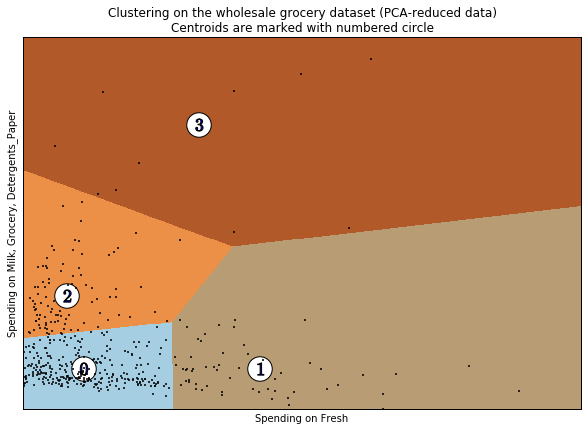

In [12]:
# fit data with different number of clusters
k_clusters = 4
est = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, \
             precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)

clusters = est.fit(reduced_data)

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

# Find the centroids for KMeans
centroids = clusters.cluster_centers_
print centroids

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)

# Labeling the clusters
'''
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
'''
# Draw white circles at cluster centers
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='o', c="white", alpha=1, s=600)
for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=150)

plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with numbered circle')
plt.xlim(x_min/1.4, x_max)
plt.ylim(y_min, y_max/1.4)
plt.xticks(())
plt.yticks(())
plt.xlabel('Spending on Fresh')
plt.ylabel('Spending on Milk, Grocery, Detergents_Paper')
plt.gca().invert_xaxis()
plt.gcf().set_size_inches(10,6.67)
plt.show()

#### Sampling the clustered data

In [13]:
# get cluster labels for the clustered data
cluster_labels = est.predict(reduced_data)

# show the j'th example from each cluster
j = 6
for i in range(k_clusters):
    print '\nSample from cluster {}:'.format(i)
    print data[cluster_labels == i][j-1:j]
    print reduced_data[cluster_labels == i][j-1]
    
# show the category averages
data.describe().loc[['mean','50%']].apply(np.round)


Sample from cluster 0:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
7   7579  4956     9426    1669              3321          2566
[ 4474.58366697  1429.49697204]

Sample from cluster 1:
    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
29  43088  2100     2609    1200              1107           823
[-29261.09304195 -10083.33750249]

Sample from cluster 2:
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
28   4113  20484    25957    1158              8604          5206
[  4895.51896784  24552.37355406]

Sample from cluster 3:
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
86  22925  73498    32114     987             20070           903
[-19878.45663259  58470.62453826]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,12000,5796,7951,3072,2881,1525
50%,8504,3627,4756,1526,816,966


**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 
> The central objects are the centroids which indicate the point within a cluster where distance to the cluster's data points is minimized. In this example, they could represent the average or prototypical customer within that customer segment.

> When using 4 clusters, we can see in the plot (x-axis reversed) that:

> 1. The lower right cluster groups customers who spend a lot on 'Fresh', but relatively less on everything else. These customers could be big restaurants.
2. The lower left cluster has customers who spend average or less than others on 'Fresh', as well as 'Milk', 'Grocery', and 'Detergents_Paper'. These could represent a range of smaller to medium sized restaurants, cafes, bars, or convenience stores.
3. The left middle cluster shows customers who spend relatively less on 'Fresh', but spend more than others on 'Milk', 'Grocery', and 'Detergents_Paper'. These could be showing medium to larger sized grocers or convenience stores.
4. The top cluster shows customers who spend a lot on 'Milk', 'Grocery', and 'Detergents_Paper', whether or not they spend more on 'Fresh' or not. These could be big grocery or big box stores.

> Most of the data is located close together in the lower left corner of the plot, with clusters that aren't very well distinguished. The visualization might be improved by reducing the data to 3 dimensions instead of 2 and producing a 3d plot to see if more distinguished clusters can be revealed.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
> PCA gave the most insight into the data, by showing that a large portion of the variance in the data could be reduced to two dimensions. This allowed us to create a 2d plot to visualize the customer spending data and view the variance in spending along each dimension. This was also helpful for reducing dimensionality to use with clustering, where we can see how different customer segments might be created.


**9)** How would you use that technique to help the company design new experiments?

Answer: 
> The PCA transformed data can be used with a clustering method to divide the customers into segments, and then perform a separate A/B test on each segment. This would allow the company to keep the experiment relatively small while still generating results for a broader spectrum of customer types.

> If an A/B test in a given segment showed a significant difference between the test treatments, the company could use that information to avoid the earlier mistake of generalizing delivery preferences from a test group to the whole population. In this case, the test could instead be used to generalize only to other customers within the same segment.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

> The PCA transformed data can be used with customers' delivery schedule preference (eg, evening delivery ok vs not ok) to construct a dataset that contains delivery preference as a label for each customer. This assumes that the company kept track of customers who complained about the previous change in delivery schedule. If such data was not kept, the company could obtain the information through surveys or asking at the next customer purchase event.

> This label could be used to do supervised learning by training a classifier to predict a customer's delivery preference based on its spending behavior. The classifier could use clustering, or other techniques such as decision trees, nearest neighbors, or SVM on the dimension reduced data. 

> The learned classifer could then be used to predict a new customer's delivery preference if a preference is not already known, or how an existing customer's delivery preference might change if its spending profile changed. This would essentially be identifying two customer segments based on delivery preference (evening delivery ok, not ok).

> With this labelled data, we could also go back to the segments identified using clustering and evaluate whether or not the segments correctly predict a given customer's label. For example, if we found that all customers in a given cluster had the same delivery preference, this would lend support to the utility of the segments that were created. If, however, the labels within a given cluster were mixed, this would suggest that the segment might need to be re-drawn or replaced with a new customer segmentation analysis.

> We might also refine the label to probe exactly how strong the customers' delivery preferences are. For example, the company could implement a morning delivery surcharge during peak demand times (ie, surge pricing) to see if that changed customer preferences. This newly labelled data (evening delivery ok during surge pricing, not ok) could then be used to see if the new labels were more uniform within the clustered customer segments.
